In [116]:
!pip install mlxtend

You are using pip version 10.0.1, however version 21.2.2 is available.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [117]:

import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from mlxtend.frequent_patterns import apriori, association_rules

In [118]:
# Loading the Data
data = pd.read_csv('Account_data.csv')
data.head()

,ACCOUNTNUMBER,ACCOUNTSTATUS,Acc_Starttime,Acc_Endtime,SERVICEID,SERVICETYPEID,SERVICESTATUS,Serv_Starttime,Serv_Endtime
0,3091648168,active,2017-10-04 21:36:32.0,2019-08-24 21:12:44.0,03091648168,wifi,active,2019-08-24 05:00:48.0,2019-08-24 05:00:48.0
1,3091648168,inactive,2019-08-24 21:12:44.0,2019-08-24 21:12:44.0,03091648168,wifi,active,2019-08-24 05:00:48.0,2019-08-24 05:00:48.0
2,3091648168,inactive,2019-11-20 08:54:22.0,NaN,03091648168,wifi,active,2019-08-24 05:00:48.0,2019-08-24 05:00:48.0
3,3091648168,active,2017-10-04 21:36:32.0,2019-08-24 21:12:44.0,03091648168,wifi,active,2019-08-24 05:00:48.0,2019-08-24 05:00:48.0
4,3091648168,inactive,2019-08-24 21:12:44.0,2019-08-24 21:12:44.0,03091648168,wifi,active,2019-08-24 05:00:48.0,2019-08-24 05:00:48.0


In [119]:
data.shape

(718, 9)

In [120]:
data.describe(include=[np.object])

,ACCOUNTSTATUS,Acc_Starttime,Acc_Endtime,SERVICEID,SERVICETYPEID,SERVICESTATUS,Serv_Starttime,Serv_Endtime
count,718,718,572,718,718,718,718,668
unique,2,30,17,15,11,2,109,77
top,active,2019-09-18 14:53:53.0,2019-09-18 14:53:53.0,03091647845,ppv,active,2018-10-10 23:51:26.0,2018-12-20 12:05:22.0
freq,431,72,108,252,133,573,21,21


In [121]:
data.dtypes

ACCOUNTNUMBER      int64
ACCOUNTSTATUS     object
Acc_Starttime     object
Acc_Endtime       object
SERVICEID         object
SERVICETYPEID     object
SERVICESTATUS     object
Serv_Starttime    object
Serv_Endtime      object
dtype: object

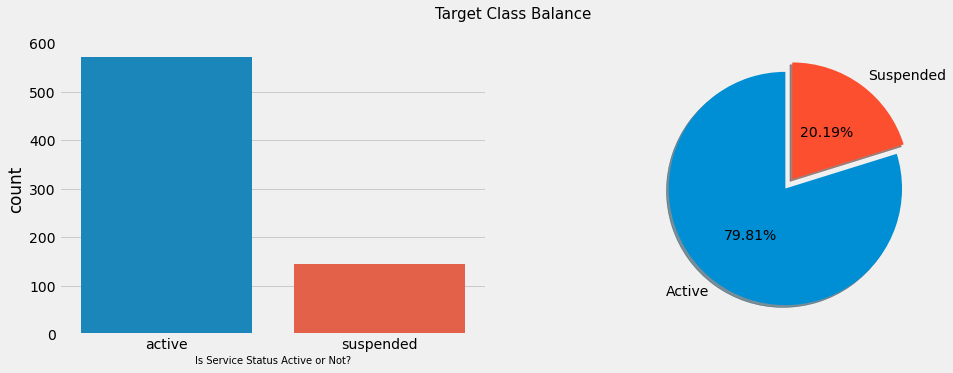

In [122]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data['SERVICESTATUS'],)

plt.xlabel('Is Service Status Active or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
data['SERVICESTATUS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Active','Suspended'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='SERVICETYPEID', ylabel='count'>

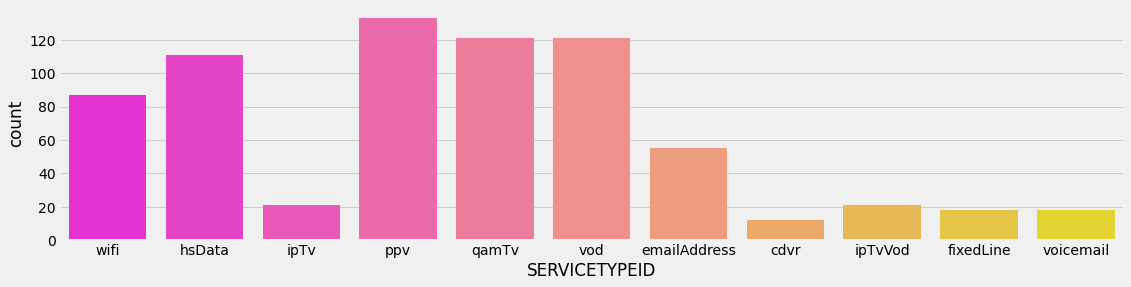

In [123]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(data['SERVICETYPEID'], palette = 'spring')

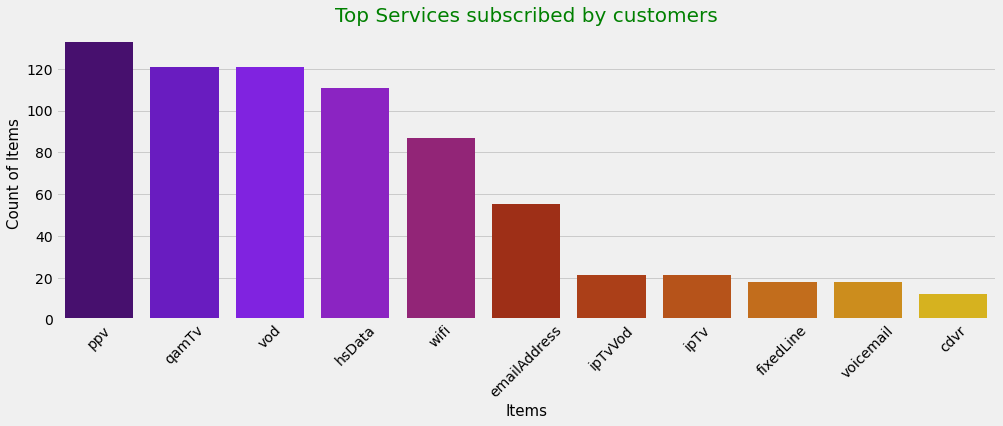

In [124]:
#plotting bargraph based on top servicetypeid
plt.figure(figsize=(15,5))
sns.barplot(x = data.SERVICETYPEID.value_counts().head(20).index, y = data.SERVICETYPEID.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top Services subscribed by customers', color = 'green', size = 20)
plt.show()

In [125]:
data.isnull().sum()

ACCOUNTNUMBER       0
ACCOUNTSTATUS       0
Acc_Starttime       0
Acc_Endtime       146
SERVICEID           0
SERVICETYPEID       0
SERVICESTATUS       0
Serv_Starttime      0
Serv_Endtime       50
dtype: int64

In [126]:
# data = data.drop('Acc_Endtime')
data=data.drop(['Acc_Endtime','Serv_Endtime'], axis = 1)
data.columns


Index(['ACCOUNTNUMBER', 'ACCOUNTSTATUS', 'Acc_Starttime', 'SERVICEID',
       'SERVICETYPEID', 'SERVICESTATUS', 'Serv_Starttime'],
      dtype='object')

In [127]:
data.isnull().sum()
data.shape

(718, 7)

In [128]:
data = data.drop_duplicates()
data= data[['ACCOUNTNUMBER','SERVICETYPEID']]
# data3 = data3.drop_duplicates()
data.shape
#data.head(10)

(480, 2)

In [129]:
data = data[['ACCOUNTNUMBER','SERVICETYPEID']].groupby(['ACCOUNTNUMBER','SERVICETYPEID']).agg('sum')
#data['SERVICETYPEID'].str.split('|')[0]
data.head(50)

Empty DataFrame
Columns: []
Index: [(3091647463, hsData), (3091647463, ppv), (3091647463, qamTv), (3091647463, vod), (3091647463, wifi), (3091647502, hsData), (3091647502, wifi), (3091647641, hsData), (3091647641, ipTv), (3091647641, ipTvVod), (3091647641, ppv), (3091647641, qamTv), (3091647641, vod), (3091647641, wifi), (3091647845, hsData), (3091647845, ppv), (3091647845, qamTv), (3091647845, vod), (3091647845, wifi), (3091647900, hsData), (3091647900, wifi), (3091648011, emailAddress), (3091648011, hsData), (3091648011, wifi), (3091648037, hsData), (3091648037, wifi), (3091648095, cdvr), (3091648095, fixedLine), (3091648095, hsData), (3091648095, ipTv), (3091648095, ipTvVod), (3091648095, ppv), (3091648095, qamTv), (3091648095, vod), (3091648095, voicemail), (3091648095, wifi), (3091648168, hsData), (3091648168, wifi), (3199183837, emailAddress), (3199183837, hsData), (3199183837, ppv), (3199183837, qamTv), (3199183837, vod), (3199183837, wifi)]

In [130]:
dataset = [['hsData', 'ppv', 'qamTv', 'vod', 'wifi'],
           ['hsData', 'wifi'],
           ['hsData', 'ipTv', 'ipTvVod', 'ppv', 'qamTv', 'vod', 'wifi'],
           ['hsData', 'ppv', 'qamTv', 'vod', 'wifi'],
           ['hsData', 'wifi'],
           ['emailAddress','hsData', 'wifi'],
           ['hsData', 'wifi'],
           ['cdvr', 'fixedLine', 'hsData','ipTv', 'ipTvVod', 'ppv', 'qamTv', 'vod', 'voicemail', 'wifi'],
           ['hsData', 'wifi'],
           ['emailAddress','hsData', 'ppv', 'qamTv', 'vod', 'wifi']]

In [141]:
#We can transform it into the right format via the TransactionEncoder as follows:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,cdvr,emailAddress,fixedLine,hsData,ipTv,ipTvVod,ppv,qamTv,vod,voicemail,wifi
0,False,False,False,True,False,False,True,True,True,False,True
1,False,False,False,True,False,False,False,False,False,False,True
2,False,False,False,True,True,True,True,True,True,False,True
3,False,False,False,True,False,False,True,True,True,False,True
4,False,False,False,True,False,False,False,False,False,False,True
5,False,True,False,True,False,False,False,False,False,False,True
6,False,False,False,True,False,False,False,False,False,False,True
7,True,False,True,True,True,True,True,True,True,True,True
8,False,False,False,True,False,False,False,False,False,False,True
9,False,True,False,True,False,False,True,True,True,False,True


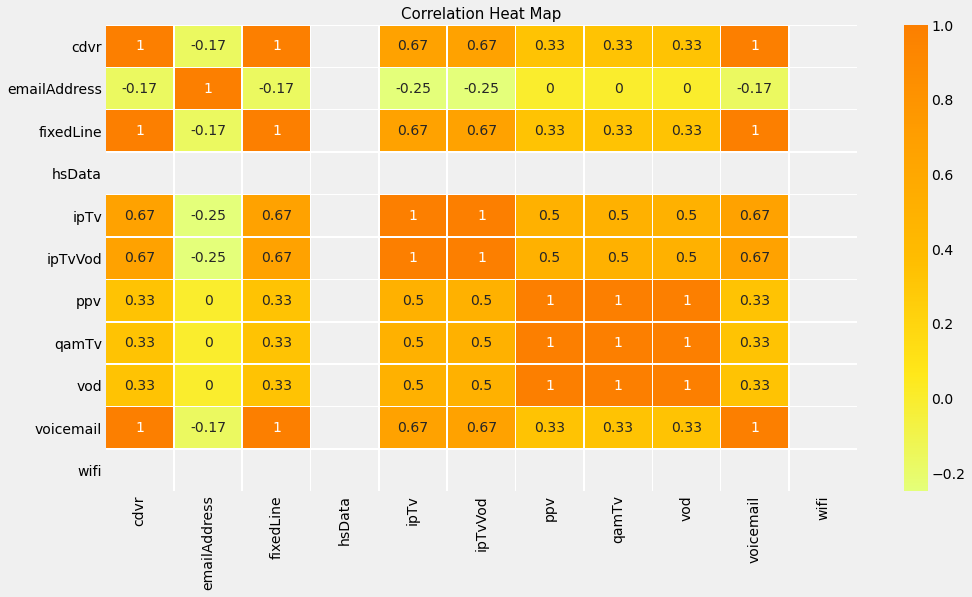

In [142]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [143]:
# Now, let us return the items and itemsets with at least 60% support:

# By default, apriori returns the column indices of the items, which may be useful in downstream operations such as association rule mining. 
# For better readability, we can set use_colnames=True to convert these integer values into the respective item names:
from mlxtend.frequent_patterns import apriori
apriori(data, min_support=0.5, use_colnames=True)

,support,itemsets
0,1.0,(hsData)
1,0.5,(ppv)
2,0.5,(qamTv)
3,0.5,(vod)
4,1.0,(wifi)
5,0.5,"(hsData, ppv)"
6,0.5,"(hsData, qamTv)"
7,0.5,"(hsData, vod)"
8,1.0,"(hsData, wifi)"
9,0.5,"(qamTv, ppv)"


In [146]:

# Building the model
frq_items = apriori(data, min_support = 0.05, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

    antecedents  consequents  antecedent support  consequent support  support  \
0        (cdvr)  (fixedLine)                 0.1                 0.1      0.1   
1   (fixedLine)       (cdvr)                 0.1                 0.1      0.1   
6        (cdvr)  (voicemail)                 0.1                 0.1      0.1   
7   (voicemail)       (cdvr)                 0.1                 0.1      0.1   
12  (voicemail)  (fixedLine)                 0.1                 0.1      0.1   

    confidence  lift  leverage  conviction  
0          1.0  10.0      0.09         inf  
1          1.0  10.0      0.09         inf  
6          1.0  10.0      0.09         inf  
7          1.0  10.0      0.09         inf  
12         1.0  10.0      0.09         inf  


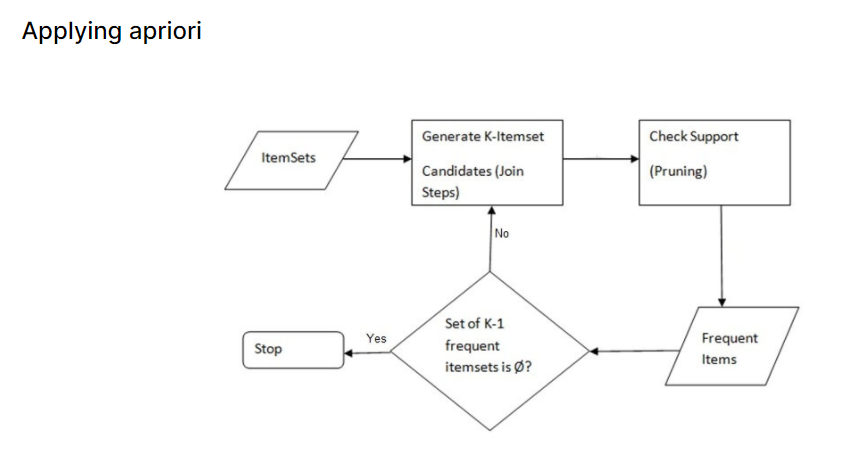

In [134]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.0,(hsData),1
1,1.0,(wifi),1
2,1.0,"(hsData, wifi)",2


In [135]:
# Then, we can select the results that satisfy our desired criteria as follows:

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
2,1.0,"(hsData, wifi)",2


In [136]:
oht_ary = te.fit(dataset).transform(dataset, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,cdvr,emailAddress,fixedLine,hsData,ipTv,ipTvVod,ppv,qamTv,vod,voicemail,wifi
0,0,0,0,True,0,0,1,1,1,0,True
1,0,0,0,True,0,0,0,0,0,0,True
2,0,0,0,True,1,1,1,1,1,0,True
3,0,0,0,True,0,0,1,1,1,0,True
4,0,0,0,True,0,0,0,0,0,0,True
5,0,1,0,True,0,0,0,0,0,0,True
6,0,0,0,True,0,0,0,0,0,0,True
7,1,0,1,True,1,1,1,1,1,1,True
8,0,0,0,True,0,0,0,0,0,0,True
9,0,1,0,True,0,0,1,1,1,0,True


Association Mining

In [137]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'qamTv', 'wifi'} ]

,support,itemsets,length


In [138]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'wifi'} ]

,support,itemsets,length
1,1.0,(wifi),1


In [139]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'hsData','wifi'} ]

,support,itemsets,length
2,1.0,"(hsData, wifi)",2


In [140]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'wifi','hsData'} ]

,support,itemsets,length
2,1.0,"(hsData, wifi)",2
